In [2]:
import numpy as np
def RTT_compute(k,alpha,RTT_mesaure):
    print("now start alpha == ",alpha)
    RTT_0 = 1
    RTT = RTT_0
    for _ in range(k):
        RTT = alpha*RTT + (1-alpha)*RTT_mesaure
        if np.abs( RTT - RTT_mesaure) < 0.00001:
            print("Premature, loop times is ",_)
            break
    return(RTT)

a1 = RTT_compute(20,0.7,0.5)
print("a1 is ",a1)
a2 = RTT_compute(20,0.5,0.5)
print("a2 is ",a2)
a3 = RTT_compute(20,0.95,0.5)
print("a3 is ",a3)


now start alpha ==  0.7
a1 is  0.5003989613314881
now start alpha ==  0.5
Premature, loop times is  15
a2 is  0.5000076293945312
now start alpha ==  0.95
a3 is  0.679242961204271


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

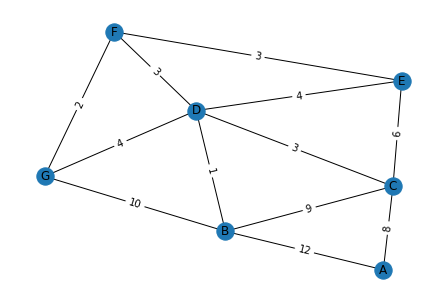

In [5]:
# Define the list of vertices and their corresponding edge weights
# Example: [('A', 'B', 3), ('B', 'C', 4), ('A', 'C', 5)]    
edges = [('A', 'B', 12), ('B', 'C', 9), ('B','D',1),('B','G','10'),('A', 'C', 8),
         ('C','D',3),('C','E',6),('D','E',4),('D','G',4),('D','F',3),
         ('E','F',3),('G','F',2)]

# Create an undirected graph
G = nx.Graph()

# Add edges to the graph with their weights
G.add_weighted_edges_from(edges)

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


# Find the shortest path tree from node E to all other nodes using Dijkstra's algorithm

# shortest_paths = nx.single_source_dijkstra_path(G, 'E')
# shortest_path_lengths = nx.single_source_dijkstra_path_length(G, 'E')

# print("Shortest paths from node E:")
# for node, path in shortest_paths.items():
#     print(f"{node}: {path}")

# print("\nShortest path lengths from node E:")
# for node, length in shortest_path_lengths.items():
#     print(f"{node}: {length}")


In [14]:
from collections import defaultdict
from itertools import combinations

def initialize_routing_table(graph, edges, nodes):
    routing_table = defaultdict(dict)
    for node in nodes:
        for edge in edges:
            if node == edge[0]:
                routing_table[node][edge[1]] = {'distance': edge[2], 'next_hop': edge[1]}
            elif node == edge[1]:
                routing_table[node][edge[0]] = {'distance': edge[2], 'next_hop': edge[0]}
    return routing_table
# Ver 1
# def update_routing_table(graph, routing_table, nodes):
#     updated = False
#     for node1, node2 in combinations(nodes, 2):
#         for dest, route_info in routing_table[node1].items():
#             if dest in routing_table[node2]:
#                 continue
#             new_distance = routing_table[node1][node2]['distance'] + route_info['distance']
#             if dest not in routing_table[node2] or new_distance < routing_table[node2][dest]['distance']:
#                 routing_table[node2][dest] = {'distance': new_distance, 'next_hop': routing_table[node2][node1]['next_hop']}
#                 updated = True
#     return updated

def update_routing_table(graph, routing_table, nodes):
    updated = False
    for node1, node2 in combinations(nodes, 2):
        if node2 not in routing_table[node1] or node1 not in routing_table[node2]:
            continue
        for dest, route_info in routing_table[node1].items():
            if dest in routing_table[node2]:
                continue
            new_distance = routing_table[node1][node2]['distance'] + route_info['distance']
            if dest not in routing_table[node2] or new_distance < routing_table[node2][dest]['distance']:
                routing_table[node2][dest] = {'distance': new_distance, 'next_hop': routing_table[node2][node1]['next_hop']}
                updated = True
    return updated

def distance_vector_algorithm(graph, edges, nodes):
    routing_table = initialize_routing_table(graph, edges, nodes)
    while update_routing_table(graph, routing_table, nodes):
        pass
    return routing_table



G = nx.Graph()
G.add_weighted_edges_from(edges)

nodes_of_interest = ['B', 'D', 'E']
nodes_of_interest_all = 'A B C D E F G'.split(' ')

routing_tables = distance_vector_algorithm(G, edges, nodes_of_interest_all)

for node, table in routing_tables.items():
    print(f"Routing table for {node}:")
    print("Destination | Distance | Next Hop")
    for dest, info in table.items():
        print(f"    {dest}     |    {info['distance']}    |    {info['next_hop']}")
    print()


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [13]:
nodes_of_interest_all = 'A B C D E F G'.split(' ')
nodes_of_interest_all = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

['A', 'B', 'C', 'D', 'E', 'F', 'G']